In [26]:
import sqlite3
import pandas as pd

cnx = sqlite3.connect('D:\Ribhav language\python_class\python_class_project\Test-2\instance\db.sqlite3')
df = pd.read_sql_query("SELECT * FROM owner", cnx)
print(df)

    id customer_name customer_username                     customer_address   
0    1        ribhav         rkcoder22  110, katra moti ram, i/s hathi gate  \
1    2        ribhav         rkcoder22  110, katra moti ram, i/s hathi gate   
2    3        ribhav         rkcoder22  110, katra moti ram, i/s hathi gate   
3    4        ribhav         rkcoder22  110, katra moti ram, i/s hathi gate   
4    5        ribhav         rkcoder22  110, katra moti ram, i/s hathi gate   
5    6        ribhav         rkcoder22  110, katra moti ram, i/s hathi gate   
6    7        ribhav         rkcoder22  110, katra moti ram, i/s hathi gate   
7    8        ribhav         rkcoder22  110, katra moti ram, i/s hathi gate   
8    9        ribhav         rkcoder22  110, katra moti ram, i/s hathi gate   
9   10        ribhav         rkcoder22  110, katra moti ram, i/s hathi gate   
10  11        ribhav         rkcoder22  110, katra moti ram, i/s hathi gate   
11  12        ribhav         rkcoder22  110, katra m

In [27]:
n = len(df)
n

12

In [28]:
df['customer_product_category_page_index'].nunique()

11

In [30]:
c=df['customer_product_heading'].value_counts().sort_values().head(10).index
print(c)

Index(['Cozy Retreat', 'Sleeping Quarters', 'Productive Space',
       'Ultimate Comfort', 'Restful Sleep', 'Nursery Nook', 'Patio Paradise',
       'Modern Chic', 'Soft Textures', 'Ambient Glow'],
      dtype='object', name='customer_product_heading')


In [15]:
category=df['customer_product_category_page']
category

0         bedroom
1         bedroom
2     home_office
3     living_room
4        mattress
5         kitchen
6         kitchen
7       baby_kids
8         outdoor
9      home_decor
10           rugs
11       lighting
Name: customer_product_category_page, dtype: object

In [16]:
prize=df['customer_product_price']
prize

0     367.0
1     294.0
2     299.0
3     580.0
4      34.0
5     359.0
6     359.0
7      86.0
8     285.0
9     186.0
10    142.0
11     12.0
Name: customer_product_price, dtype: object

In [17]:
df['customer_product_price']=pd.to_numeric(df['customer_product_price'])

In [18]:
import numpy as np
import matplotlib.pyplot as plt
table = pd.pivot_table(df, values='customer_product_price', index=['customer_product_category_page'],aggfunc=np.sum)
table=table.sort_values(by="customer_product_price",ascending=False)
table

,customer_product_price
customer_product_category_page,
kitchen,718.0
bedroom,661.0
living_room,580.0
home_office,299.0
outdoor,285.0
home_decor,186.0
rugs,142.0
baby_kids,86.0
mattress,34.0


In [19]:
type(table)

pandas.core.frame.DataFrame

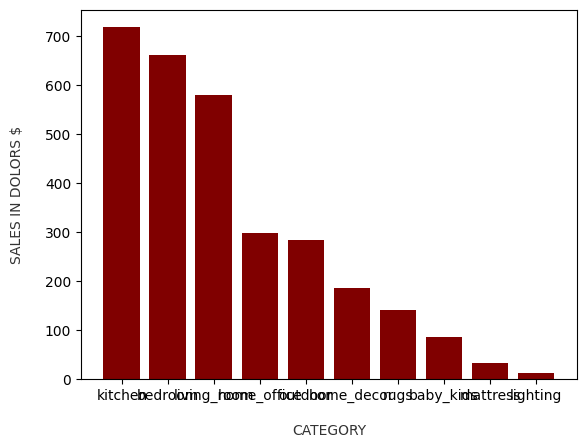

In [22]:
plt.bar(table.index,table['customer_product_price'],color ='maroon')
plt.ylabel('SALES IN DOLORS $', labelpad=15, color='#333333')
plt.xlabel('CATEGORY', labelpad=15, color='#333333')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

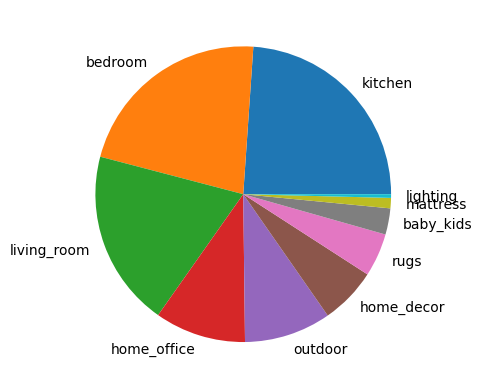

In [31]:
plt.pie(table['customer_product_price'],labels=table.index)
plt.show()

In [23]:
color_map = {'living_room	': 'r', 'bedroom': 'b', 'mattress': 'y',
             'kitchen': 'g', 'baby_kids': 'm', 'outdoor': 'c',
             'lighting	': 'lime', 'rugs': 'violet', 'home_decor': 'orange',
             'home_office': 'magenta'}


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0           b
1           b
2     magenta
3         NaN
4           y
5           g
6           g
7           m
8           c
9      orange
10     violet
11        NaN
Name: customer_product_category_page, dtype: object

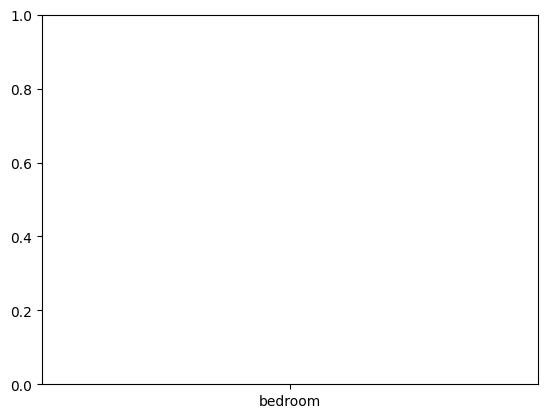

In [25]:
ax = plt.subplot()
x, y = df.customer_product_category_page, df.customer_product_price
colors = df.customer_product_category_page.map(color_map)
ax.scatter(x, y, c=colors)